In [1]:
!gdown 16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h

Downloading...
From: https://drive.google.com/uc?id=16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h
To: /content/4K_House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 52.9MB/s]


reading and manupulating dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv("4K_House_Rent_Dataset.csv")
dataset.shape
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
x1 = dataset["Size"]
x2 = dataset["Bathroom"]
x3 = dataset["BHK"]
x4 = dataset["Furnishing Status"].replace({"Unfurnished": 0, "Semi-Furnished": 1, "Furnished": 2}).values

y = dataset["Rent"]

In [7]:
X = np.array([[a0,a1,a2,a3,a4] for a0,a1,a2,a3,a4 in zip(np.ones(len(y)),x1,x2,x3,x4)])

In [8]:
Y = np.array(y)

Normal Equation

In [9]:
def calculate_thetas(X, Y):
  xt = np.transpose(X)
  xtx = np.matmul(xt, X)
  xty = np.matmul(xt, Y)
  INV_xtx = np.linalg.inv(xtx)
  return np.matmul(INV_xtx, xty)

In [10]:
thetas = calculate_thetas(X, Y)
print("Thetas: ", thetas)

Thetas:  [-4.23693863e+04  2.35095594e+01  2.64676202e+04 -1.29289804e+03
  6.93957077e+03]


In [11]:
def predict(X_test):
  return np.sum(np.multiply(X_test, thetas))
print("Prediction for (1000, 2, 2, 1): ", predict([1, 1000, 2, 2, 1]))

Prediction for (1000, 2, 2, 1):  38429.18818439308


In [15]:
def calculate_(X, Y):
  return np.sum([(predict(x) - y) ** 2 for x, y in zip(X, Y)]) / (2 * len(X))
print("Cost: ", calculate_(X, Y))

Cost:  2394004443.1277666


In [17]:
def plot(x, y, label_x, label_y, theta, theta0):
  lin_x = np.linspace(np.min(x), np.max(x), 10)
  reg_line = theta * lin_x + theta0
  plt.plot(lin_x, reg_line, c='y', label='Regression Line')
  plt.scatter(x, y, label = 'Scatter Plot')
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.legend()
  plt.show()

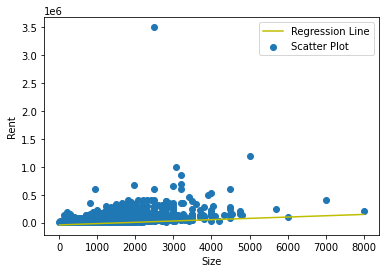

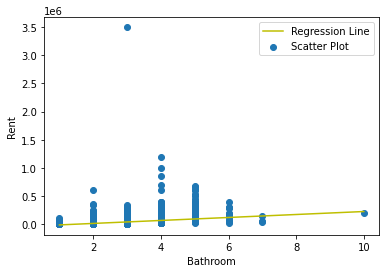

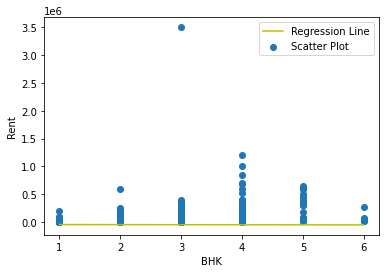

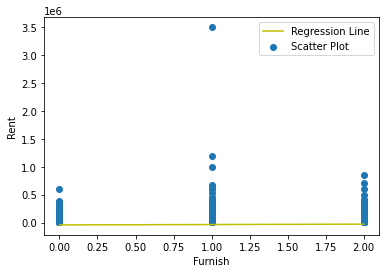

In [19]:
plot(x1, y, "Size", "Rent", thetas[1], thetas[0])
plot(x2, y, "Bathroom", "Rent", thetas[2], thetas[0])
plot(x3, y, "BHK", "Rent", thetas[3], thetas[0])
plot(x4, y, "Furnish", "Rent", thetas[4], thetas[0])